# Image Processing with Python -- Tutorial Pipeline -- <font color='orange'>SOLUTIONS</font>

##  About this Tutorial -- <font color='orange'> Notes on the Solutions </font>

These are the **complete solutions** to the tutorial. For the best learning experience, *it is recommended that you first try to implement a solution yourself* (see `tutorial_pipeline.py`). Only come here if you are totally stuck or if you have a working solution and would like to double-check it.

Note that there are multiple ways of implementing any particular step in the pipeline, so if your solution is different from the solution here, it is not necessarily wrong. However, *some solutions are better than others* because they are...

1. ...more readable:
    - When reading the code, it is obvious and clear what the code is doing
    - The code is clearly commented to help others (and your future self) understand it


2. ...more general:
    - The code still works if there are minor changes to the data (e.g. size of the image being processed)
    - The code can easily be transformed into a solution for a similar problem


3. ...more computationally efficient:
    - No unnecessary copies of large datasets are made (memory efficiency)
    - Faster algorithms are used, e.g. array operations instead of loops (CPU efficiency)
    - No unnecessary loading and writing of data (io efficiency)


It is up to you to decide if your solution is better, equally good, or not as good as the solution presented here. Either way, we hope you can learn something by looking at our solutions. **:)**

## Setup

In [3]:
from __future__ import division
print 3/2

1.5


## Importing Modules & Packages

In [4]:
# The numerical array package numpy as np
import numpy as np

#### <font color='orange'> Exercise Solution </font> 

Using the import command as above, follow the instructions in the comments below to import two additional modules that we will be using frequently in this pipeline.

In [5]:
# The plotting module matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# The image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

## Import and Prepare Data

#### <font color='orange'> Exercise Solution </font>

We will now proceed to import some image data, verifying that we get what we expect and then further specifying the data we will work with. Before you start, it makes sense to have a quick look at the data in Fiji/ImageJ so you know what you are working with!

Follow the instructions in the comments below.

Loaded array is of type: <type 'numpy.ndarray'>
Loaded array has shape: (2L, 930L, 780L)
Loaded values are of type: uint8


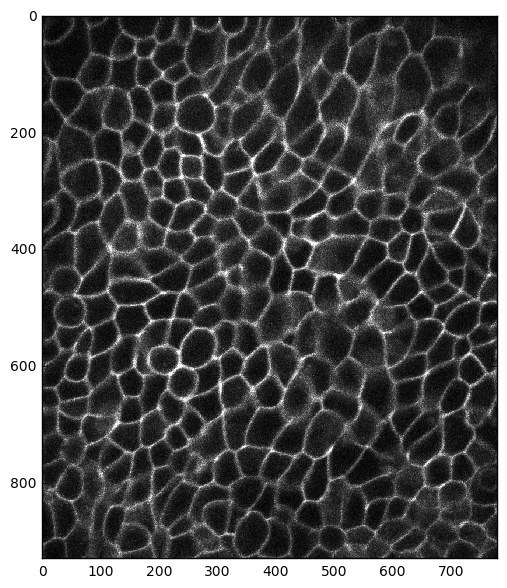

In [6]:
# (i) Specify the filename
# Create a string variable with the name of the file to be imported ('example_cells_1.tif')
# Suggested name for the variable: filename
# Note: If the file is not in your current working directory, the filename variable must contain the 
#       entire path to the file, for example r'/home/jack/data/example_cells_1.tif'. Note the r at
#       the beginning of the string: it designates this string as a "raw" string, which helps to
#       avoid problems with slashes and other special symbols
filename = r'/home/jack/data/example_cells_1.tif'
filename = 'example_cells_1.tif'   # XXX: DELETME!


# (ii) Load the image
# Import the function 'imread' from the module 'tifffile'.
from tifffile import imread

# Load 'example_cells_1.tif' and store it in a variable.
# Suggested name for the variable: img
img = imread(filename)


# (iii) Check that everything is in order
# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print "Loaded array is of type:", type(img)

# Print the shape of the array using the numpy-function 'shape'. 
# Make sure you understand the output; recall that the image has 2 color channels and is 930 by 780 pixels. 
print "Loaded array has shape:", img.shape

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print "Loaded values are of type:", img.dtype

# SOLUTION NOTE: The dtype should be 'uint8', because these are unsigned 8-bit integer images.
#                This means that the intensity values range from 0 to 255 in steps of 1.


# (iv) Allocate the green channel to a separate new variable
# For segmentation, we will only work with the green channel, so we need to allocate it to a new variable. 
# The green channel in this image is the first channel (or channel 0 in python). 
# We can allocated it to a new variable by slicing the 'img' array.
# Hint: Recall that the image has three dimensions, two (rows and columns) defining the size of the image 
#       in terms of pixels, and one defining the number of channels. To slice the array, you need to index  
#       each dimension to specify what you want from it.
#       For example, array A below has two dimensions.
#         A = np.array([[1,2,3],[4,5,6]])
#       To obtain all entries in the first row, we would slice like this:
#         B = A[0,:]
#       You can slice the 2D green channel out of the 3D 'img' array in a similar fashion. 
green = img[0,:,:]


# (v) Look at the image to confirm that everything worked as intended
# Show one of the channels as an image; use pyplot's functions plt.imshow followed by plt.show. 
# Check the documentation for plt.imshow and note the parameters that can be specified, such as the color map (cmap)
# and interpolation. Since you are working with scientific data, interpolation is unwelcome, so you should set it to
# 'none'. The most common cmap for grayscale images is naturally 'gray'.
# You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with
# the function plt.figure before calling plt.imshow. The canvas size is adjusted using the keyword argument
# figsize when calling plt.figure.
plt.figure(figsize=(7,7))
plt.imshow(green,interpolation='none',cmap='gray')
plt.show()

## Preprocessing

#### <font color='orange'> Exercise Solution </font>

Follow the instructions in the comments below:

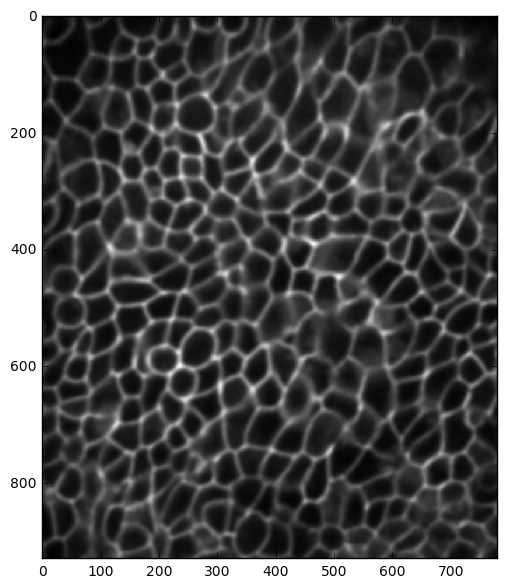

In [7]:
# (i) Create a variable for the smoothing factor sigma, which should be an integer value
# After implementing the Gaussian smoothing function below, you can modify this variable 
# to find the ideal value of sigma.
sigma = 3

# (ii) Perform the smoothing on the image
# To do so, use the Gaussian filter function 'ndi.filters.gaussian_filter' from the 
# image processing package ndimage, which was imported at the start of the tutorial. 
# Check out the documentation of scipy to see how to implement this function. 
# Allocate the output to a new variable.
green_smooth = ndi.filters.gaussian_filter(green,sigma)

# (iii) Visualise the result using plt.imshow and plt.show
# Compare with the original image visualised in the step above. 
# Does the output make sense? Is this what you expected? 
# Can you optimize sigma such that the image looks smooth without blurring the membranes too much?
plt.figure(figsize=(7,7))
plt.imshow(green_smooth,interpolation='none',cmap='gray')
plt.show()

### Adaptive Thresholding

#### <font color='orange'> Exercise Solution </font>

Implement the two steps of adaptive background subtraction:

1. Use a strong "mean filter" to create the background image. This simply assigns each pixel the average value of its local neighborhood. Just like the Gaussian blur, it can be done by deconvolution, but this time using a "uniform kernel".

2. Use the background image for thresholding. Pixels with higher values in the original image than in the background should be given the value 1 and pixels with lower values in the original image than in the background should be given the value 0. The resulting binary image should represent the cell membranes.

Follow the instructions in the comments below.

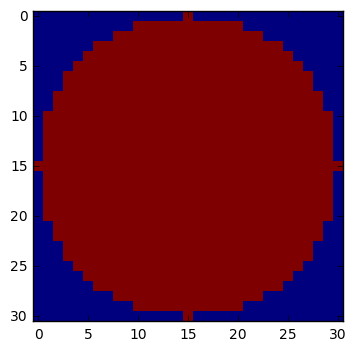

In [20]:
# Step 1

# (i) Create a disk-shaped structuring element and asign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel. 
#
# An example of a small disk-shaped SE would be this:
#   0 0 1 0 0
#   0 1 1 1 0
#   1 1 1 1 1
#   0 1 1 1 0
#   0 0 1 0 0
#
# The equation below creates such structuring elements. 
# It is an elegant but complicated piece of code and at the moment it is not 
# necessary for you to understand it in detail. Use it to create structuring 
# elements of different sizes (by changing 'i') and find a way to visualize 
# the result.
# 
# Try to answer the following questions: 
#   - Is the resulting SE really circular?  >>> Close enough for large i, not so much for small i
#   - Can certain values of 'i' cause problems? If so, why?  >>> Even values create a slight asymmetry!
#   - What value of i should used for the se? 
#     Note that, similar to the sigma in Gaussian smoothing, the size of the SE
#     is first estimated based on the images and by thinking about what would 
#     make sense. Later, it can be optimized by trial and error.
#     >>> My first guess was i=30 (about 3x the membrane diameter). 
#         I tried out some other values but ultimately stuck with this.
i = 31
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2
plt.imshow(struct,interpolation='none')
plt.show()

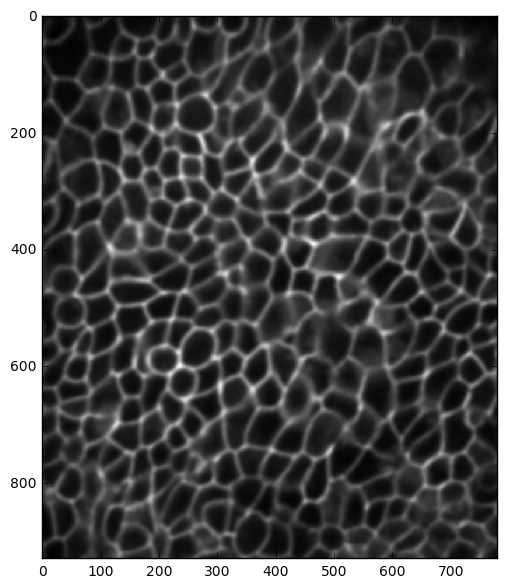

In [16]:
# (ii) Create the background
# Run a mean filter over the image using the disc SE and assign the output to a new variable.
# Use the function 'skimage.filters.rank.mean' (you first need to import the 'skimage.filters.rank' module).
# Think about why a mean filter is used and if a different function (e.g. minimum, maximum or median) 
# would work equally well.
from skimage.filters import rank 
bg = rank.mean(green_smooth, selem=struct)

# (iii) Visualise the resulting background image. 
# Compare it to the images generated above. Does the outcome make sense?
plt.figure(figsize=(7,7))
plt.imshow(green_smooth,interpolation='none',cmap='gray')
plt.show()

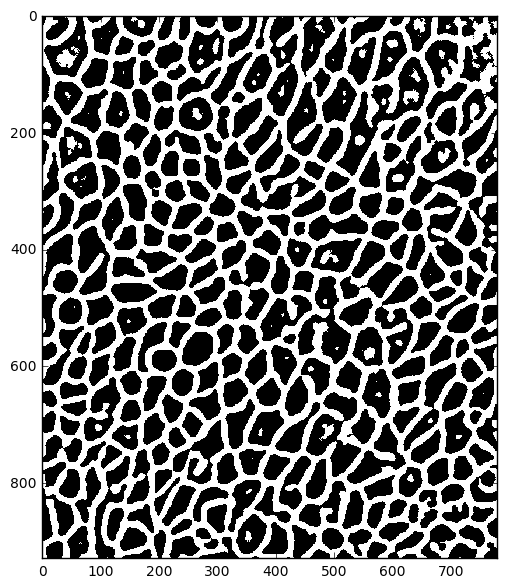

In [21]:
# Step 2  

# (iv) Threshold the Gaussian-smoothed original image using the background image created in step 1 
#      to obtain the cell membrane segmentation
# Set pixels with higher values in the original than in the bg to 1 and pixels with lower values to 0. 
# You can use a "relational operator" to do this, since numpy arrays will automatically perform element-wise
# comparisons when compared to other arrays of the same shape.
green_mem = green_smooth >= bg

# (v) Visualise and understand the output. 
# What do you observe? 
# Are you happy with this result as a membrane segmentation? 
# >>> Not really; there is too much stuff inside the cells!
plt.figure(figsize=(7,7))
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

#  <font color='red'> YOU ARE HERE! </font>

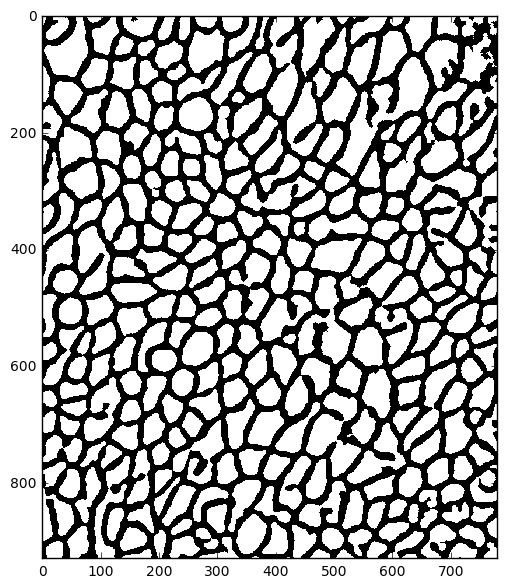

In [18]:
# (vi) Further clean the output using binary morphological operations
# You can try out dilation, erosion, opening and closing. They are all available in ndimage, 
# for example 'ndi.binary_closing'. See what is best in terms of reducing false positives 
# (spots of foreground inside the cells) and false negatives (gaps in membranes).

# A less common but very useful morphological operation to get rid of false positive spots 
# is binary hole filling, which removes objects that are not connected to the image boundaries. 
# The corresponding ndimage function is 'ndi.binary_fill_holes'.
green_mem = ndi.binary_fill_holes(np.logical_not(green_mem))


# (vii) Visualize the final result
# If you are not satisfied with the quality of the membrane segmentation, go back to tune
# the size of the SE and the morphological cleaning operations. Note that the quality of
# the membrane segmentation will have a significant impact on the cell segmentation we will
# perform downstream.
plt.figure(figsize=(7,7))
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

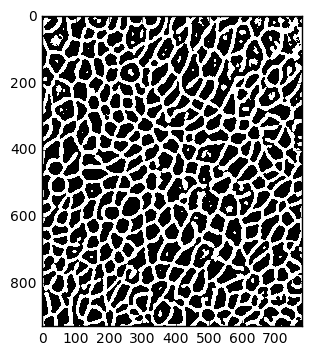

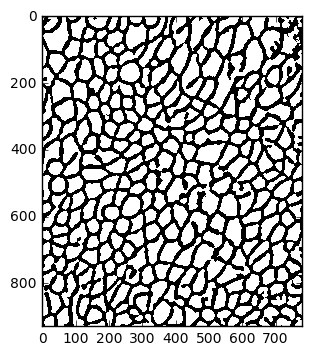

In [7]:
# Step 2  

# (iv) Threshold the image 'green_smooth' using created background 'bg' to obtain the cell membrane segmentation:

    # Set pixels with higher values in the original than in the bg to 1 and pixels with lower values to 0. You can use a relational operator to do this, since numpy arrays will automatically perform element-wise comparisons when compared to other arrays of the same shape. Remember to allocate the output to a new variable. (Suggested name for variable: 'green_thresh')
struct = ((np.mgrid[:31,:31][0] - 15)**2 + (np.mgrid[:31,:31][1] - 15)**2) <= 15**2  # Create a disk-shaped structural element
from skimage.filters import rank            # Import module containing mean filter function
bg = rank.mean(green_smooth, selem=struct)  # Run a mean filter over the image using the disc
# Threshold using created background
green_mem = green_smooth >= bg

# (v) Visualise and understand the output. What do you observe? Are you happy with this result as a membrane segmentation? 
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

# (vi) Further clean the output using binary morphological operations.

    # You can try out dilation, erosion, opening and closing (all available in ndimage, for example 'ndi.binary_closing') and see what is better in terms of reducing false positives (spots of foreground inside the cells) and false negatives (gaps in membranes).

    # A less common but very useful morphological operation to get rid of false positive spots is binary hole filling, which removes objects that are not connected to the image boundaries. The corresponding ndimage function is 'ndi.binary_fill_holes'. Assign your final result to a new variable (suggested name for variable: 'green_mem').
green_mem = ndi.binary_fill_holes(np.logical_not(green_mem))

# (vii) Visualize the final result, then go back and tune the size of the se and the morphological cleaning operations until you are happy with the resulting membrane segmentation.
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

## Connected Components Labeling (Or: "We Could Be Done Now")

If the data is clean and we just want a very quick cell or membrane segmentation, we could be done now. All we would still need to do is to label the individual cells - in other words, to give each separate "connected component" an individual number.

#### Exercise
Follow the instructions in the comments below.

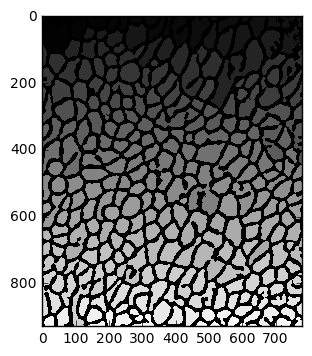

In [8]:
# (i) Label connected components:

     # Collections of consecutive pixels that have the same value are considered as connected regions and, if the segmentation has been done correctly, they correspond to specific objects of the image, for example different cells. We can label each of them with a different integer value using the function 'ndi.label'. This enables us to make quantitative measurements for each cell individually. (Suggested name for variable: 'green_components'). 
green_components = ndi.label(green_mem)[0] 

# (ii) Visualise the output.
plt.imshow(green_components,interpolation='none', cmap='gray')    
plt.show()


#### Observation
The result you get here should look not to bad but will likely still have some problems. For example, some cells will be connected because there were small gaps between them in the membrane. Also, the membranes themselves are not partitioned to the individual cells, so we cannot make measurements of membrane intensities for each cell. These problems can be resolved by means of a "seeding-expansion" strategy, which we will implement below.

## Improved Cell Segmentation by Seeding & Expansion

### Seeding by Distance Transform

Seeding refers to the identification of 'seeds', a few pixels that can assigned to each particular cell with great certainty. If available, a channel showing the cell nuclei is often used for seeding. However, using the membrane segmentation we have developed above, we can also generate relatively reliable seeds without the need to image nuclei.

We can find seeds based on a membrane segmentation using a distance transform, which essentially maps the distance of each pixel in the cells from the nearest membrane pixel. Maxima (or 'peaks') in the resulting distance 'map' can be considered seeds. Unlike the labeling we do above, this approach can generate more than one seed even if two cells are connected by a gap in the membrane. Thus, it allows us to split up cells that would be wrongly fused by connected component labeling.

#### Exercise
Folow the instructions in the comments below.

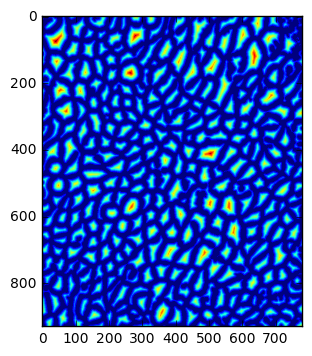

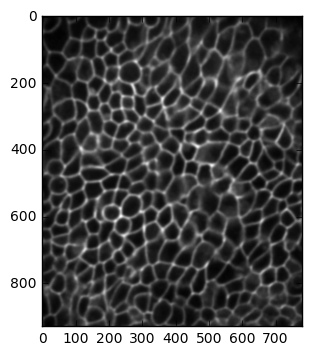

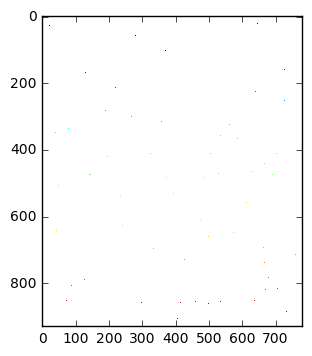

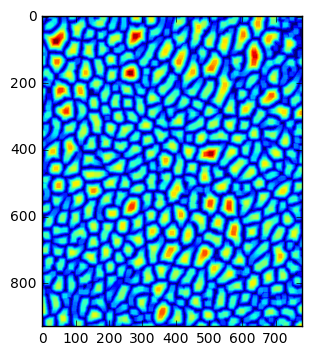

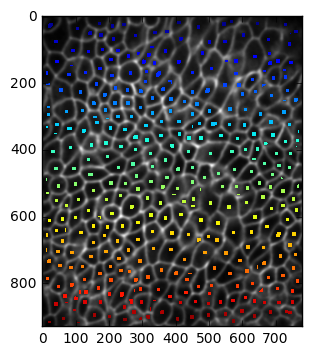

In [9]:
# (i) Distance transform on thresholded membranes:

    # The distance transform assigns each foreground pixel a value corresponding to its distance from the closest background pixel. To apply a distance transform, use the function 'ndi.distance_transform_edt'. (Suggested name for output variable: 'green_dt'). 
green_dt= ndi.distance_transform_edt(green_mem)

# (ii) Visualise the output and understand what you are seeing.
plt.imshow(green_dt,interpolation='none')
plt.show()

# (iii) Retrieve the local maxima (the 'peaks' in the distance transform 'map')

    # Import the function 'peak_local_max' from the module 'skimage.feature'
from skimage.feature import peak_local_max

    # Detect local maxima: use peak_local_max to detect the local maxima. Use the optional arguments min_distance=10 and indices=False. Remember to use the documentation to understand the function and its arguments. (Suggested name for variable: 'green_max')
green_max = peak_local_max(green_dt,indices=False,min_distance=10)

    # Label the connected components to give each seed an individual number. (Suggested name for variable: 'green_seeds')
green_max = ndi.label(green_max)[0]

# (iv) Visualise the output by showing the seeds as a masked overlay. In other words, you should overlay the maxima (the seeds) on the original input image (or on smoothed version):

    # To do this, it is important to first understand a key point about how the pyplot module works: every plotting command is slapped on top of the previous plotting commands, until everything is ultimately shown when 'plt.show' is called. Hence, you can first plot the input (or smoothed) image and then plot the seeds on top of it before showing both with 'plt.show'.
plt.imshow(green_smooth,cmap='gray',interpolation='none')
plt.show()
    # As you can see if you try this, you will not get the desired result because the zero values in 'green_seeds' are painted in black over the image you want in the background. To solve this problem, you need to mask these zero values before plotting 'green_seeds'. You can do this using the function 'np.ma.array' to create a masked array.
plt.imshow(np.ma.array(green_max,mask=green_max==0),interpolation='none') 
plt.show()
    # What do you observe?


# (v) Dilating (maximum filter) of distance transform:

    # Ideally, there should be only one seed per cell. However, irregularities in the membrane shape can cause multiple distance transform peaks in each cell. This can be improved by cleaning the distance transform using a dilation before detecting the maxima. 
    
    # Use ndi.filters.maximum_filter to dilate the distance transform. Read the documentation to remind yourself how and where the structuring element can be defined with this function. You can try different structuring element sizes and shapes, if you like. 
green_dt = ndi.filters.maximum_filter(green_dt,size=10) 

# (vi) Visualise the output.
plt.imshow(green_dt,interpolation='none')
plt.show()

# (vii) Retrieve and label the local maxima again:

    # Local maximum detection (as above, use the 'peak_local_max' function). (Suggested name for variable: 'green_max')
green_max = peak_local_max(green_dt,indices=False,min_distance=10)

    # Label the connected components (Suggested name for variable: 'green_seeds')
green_max = ndi.label(green_max)[0]

# (viii) Visualise the output by showing maxima as masked overlay again. Did the dilation improve the seeding? If you're not happy yet, you can try to optimize the seeding by playing with the parameters of the dilation (in other words, with the se size and shape). 
plt.imshow(green_smooth,cmap='gray',interpolation='none')
plt.imshow(np.ma.array(green_max,mask=green_max==0),interpolation='none') 
plt.show()


### Expansion by Watershed

The generated seeds are expanded into regions of the image where the cell assignment is less clear-cut than in the seed region itself. The goal is to expand each seed exactly up to the borders of the corresponding cell, resulting in a full segmentation. The watershed technique is the most common algorithm for expansion.

Watershedding is a relatively simple but powerful algorithm for expanding seeds. The image intensity is considered as a topographical map (with high  intensities being "mountains" and low intensities "valleys") and water is poured into the valleys, starting from each of the seeds. The water first labels the lowest intensity pixels around the seeds, then continues to fill up. The cell boundaries (the 'mountains') are where the "waterfronts" between different seeds ultimately touch and stop expanding.

#### Exercise
Follow the instructions in the comments below.

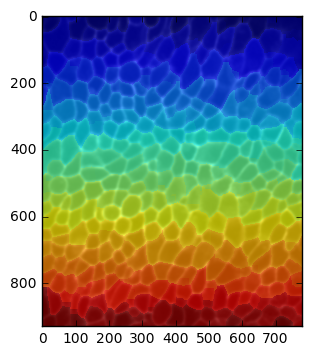

In [10]:
# Watershed:

    # Get the 'watershed' function from 'skimage.morphology'. 
from skimage.morphology import watershed

    # Tun the watershed, using green_smooth as the image topography and green_seeds as seeds. You can also try using the (inverted) distance transform as image topograpy if you're curious to see how the result differs from using green_smooth. Think about the advantages and disadvantages of either approach. (Suggested name for output variable: 'green_ws')
green_ws = watershed(green_smooth,green_max)

    # Show the result as transparent overlay over the smoothed input image. This can be done similar to the masked overlay of the seeds, but now you don't need to mask the background in the overlayed image - instead, you need to make the overlayed image semi-transparent. This can be achieved using the optional argument 'alpha' of the 'plt.imshow' function to specify the opacity.
plt.imshow(green_smooth,cmap='gray',interpolation='none')
plt.imshow(green_ws,interpolation='none',alpha=0.7) 
plt.show()

#### Observation
Note that the previously connected cells are now mostly separated and the membranes are partitioned to their respective cells. Depending on the quality of the seeding, however, there may now be some cases of oversegmentation (a single cell split into multiple segmentation objects). This is a typical example of the trade-off between specificity and sensitivity one always has to face in computational classification tasks. As an advanced task, you can try to think of ways to fuse the wrongly oversegmented cells back together.

### Identification of Cell Edges

Now that we have a full cell segmentation, we can retrieve the cell edges, that is the pixels bordering neighboring cells. This is useful for many purposes; in our case, for example, edge intensities are a good measure of membrane intensity, which may be a desired readout. The length of the edge (relative to cell size) is also an informative feature about the cell shape. Finally, showing colored edges is a nice way of visualizing cell segmentations.

There are many ways of identifying edge pixels in a fully labeled segmentation. It can be done using erosion or dilation, for example, or it can be done in an extremely fast and fully vectorized way (for this, see "Vectorization" in the optional advanced content). Here, we use a slow but intuitive method that also serves to showcase the `generic_filter` function in ndimage.

`ndi.filters.generic_filter` is a powerful way of quickly iterating any function over numpy arrays (including functions that use a structuring element). `generic_filter` iterates a structure element over all the values in an array and passes the corresponding values to a user-defined function. The result returned by this function is then allocated to the pixel in the image that corresponds to the origin of the se. Check the documentation to find out more about the arguments for `generic_filter`.

#### Exercise
Follow the instructions in the comments below.

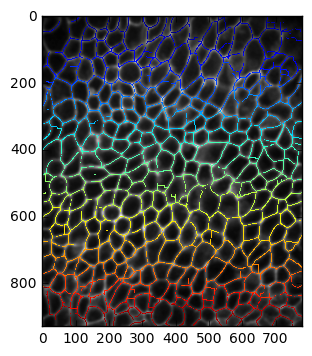

In [11]:
# (i) Define a function called 'edge_finder' that you can pass to 'ndi.filters.generic_filter':
    # Your 'edge_finder' function should detect if the central pixel in a 3x3 array is at an edge. This is true whenever the central pixel is not identical to all other pixels in the 3x3 array. More specifically, your function should...
    # ...take in as input the values from a 3x3 se (representing a neighbourhood around a pixel), 
    # ...check if all pixels are the same or not (function 'np.all' is helpful here)
    # ...return 1 or 0, respectively.

    # Remember that to define a new function the syntax is as follows:
    #
    # def function_name(input arguments): 
    #   """function documentation string"""
    #   function procedure
    #   return [expression]
def edge_finder(footprint_values):
    if (footprint_values == footprint_values[0]).all():
        return 0
    else:
        return 1

# (ii) Iterate your 'edge_finder' function over the segmentation ('green_ws') using the 'ndi.filters.generic_filter' function, (with optional argument size=3 to get a 3x3 kernel). Allocate the output to a new variable (suggested name: 'green_edges')
green_edges = ndi.filters.generic_filter(green_ws,edge_finder,size=3)

# (iii) Label the detected edges:

    # Based on the underlying cell, each edge pixel can be labeled correctly. (Suggested output name: 'green_edges_labeled').
    # Hint: Use array multiplication - 'green_edges' is a binary array (consists of 1s and 0s) and 'green_ws' contains the cells nicely numbered.
green_edges_labeled = green_edges * green_ws

# (iv) Visualize as a masked overlay of labaled edges over the smoothed original image.
plt.imshow(green_smooth,cmap='gray',interpolation='none')
plt.imshow(np.ma.array(green_edges_labeled,mask=green_edges_labeled==0),interpolation='none') 
plt.show()


## Postprocessing: Removing Cells at the Image Border

Segmentation is never perfect and it often makes sense to remove artefacts afterwards. For example, one could filter out objects that are too small, have a very strange shape, or very strange intensity values. Note that this is equivalent to the removal of outliers in data analysis and should only be done for good reason and with caution.

As an example of postprocessing, we will now filter out a particular group of problematic cells: those that are cut off at the image border.

#### Exercise
Follow the instructions in the comments below.

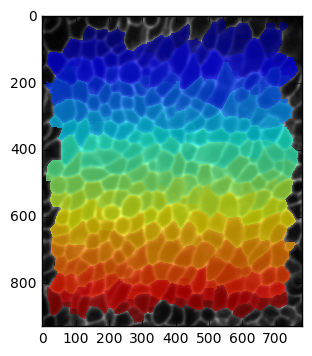

In [12]:
# (i) Create image border mask:

    # Remember that a mask is a binary array with a specific size and distribution of ones and zeros. To identify the cells that border the image and should thus be excluded from the analysis, you first need to create a mask where the pixels at the image boundary are set to 1 and everything else is set to 0. (Suggested name for output variable: 'boundary_mask')
    # Hint: There are different ways of achieving this, for example by erosion or by array indexing. The function 'np.ones_like' may be useful. 
boundary_mask = np.ones_like(green_ws)   # Initialize with all ones
boundary_mask[1:-1,1:-1] = 0             # Set middle square to 0

# (ii) 'Delete' the cells at the border:

    # Iterate over all cells in the segmentation. This is easily done using a 'for' loop and the function 'np.unique'. Remember that 'green_ws' has each cell labaled with a different integer.

    # For each cell, identify if it has pixels touching the image boundary or not. There is an easy solution to this that relies on relational operations and some basic arithmetic.

    # "Delete" the cells at the boundary, by changing their intensity values to 0.

    # (Optionally, relabel the cells not at the boundary to keep the numbering consistant from 1 to N (with 0 as background).
current_label = 1
for cell_id in np.unique(green_ws):
    # If the current cell touches the boundary, remove it
    if np.sum((green_ws==cell_id)*boundary_mask) != 0:
        green_ws[green_ws==cell_id] = 0
    # This is to keep the labeling continuous, which is cleaner
    else:
        green_ws[green_ws==cell_id] = current_label
        current_label += 1


# (iii) Visualise result:
    # Show the result as transparent overlay of the watershed over the blurred original. You now have to combine both alpha (to show cells transparently) and 'np.ma.array' (to hide empty space where the border cells were deleted).
plt.imshow(green_smooth,cmap='gray',interpolation='none')
plt.imshow(np.ma.array(green_ws,mask=green_ws==0),interpolation='none',alpha=0.7) 
plt.show()


## Measurements: Single-Cell & Membrane Readouts

Now that the cells and membranes in the image are segmented, we can quantify various readouts for every cell individually. Readouts can be based on the intensity in different channels in the original image or on the size and shape of the cells themselves.

To exemplify how different properties of cells can be measured, we will quantify the following:

- Cell ID (so all other measurements can be traced back to the cell that was measured)
- Mean intensity of each cell, for each channel
- Mean intensity at the membrane of each cell, for each channel
- The cell size, in terms of the number of pixels that make up the cell
- The cell outline length, in terms of the number of pixels that make up the cell boundary

We will use a dictionary to collect all the information in an orderly fashion.

#### Exercise
Follow the instructions in the comments below.

In [13]:
# (i) Create a dictionary that contains a key-value pairing for each of the measurements mentioned above. The key should be a string describing the type of measurement (e.g. 'green_intensity_mean') and the value should be an empty list. We will fill these empty lists with the results of our measurements and the dictionary will make it easy to retrieve this data.
results = {"cell_id":[],
           "green_mean":[],
           "red_mean":[],
           "green_membrane_mean":[],
           "red_membrane_mean":[],
           "cell_size":[],
           "cell_outline":[]}

# (ii) Record the measurements:
    
    # Iterate over segmented cells using a for loop and the 'np.unique' function (you've done this before in exercise (ii) of section 7)
for cell_id in np.unique(green_ws)[1:]:
        # Mask away everything in the image except the current cell
    cell_mask = green_ws==cell_id  
    edge_mask = np.logical_and(cell_mask,green_edges)
        # Use the masked image to acquire the measurements listed above. Add them to the appropriate list in the result dictionary (you can use the list method 'list.append' to add elements to a list). Note that you should use the original raw data for quantification. 
    results["cell_id"].append(cell_id)
    results["green_mean"].append(np.mean(img[0,:,:][cell_mask]))
    results["red_mean"].append(np.mean(img[1,:,:][cell_mask]))    
    results["green_membrane_mean"].append(np.mean(img[0,:,:][edge_mask]))    
    results["red_membrane_mean"].append(np.mean(img[1,:,:][edge_mask]))    
    results["cell_size"].append(np.sum(cell_mask))
    results["cell_outline"].append(np.sum(edge_mask))
    
# Hint 1: If you have saved the final segmentation in 'green_ws', you can run the following code to see what is meant by "masking away" everything except the current cell. For membrane measurements you can use 'green_edges' instead.
#cell_mask = green_ws==1
#plt.imshow(cell_mask)
#plt.show()


# Hint 2: Recall that you can index an array with another (logical) array. This makes the acquisition of measurements for each cell much easier. This is a simple example (note that the raw data is used):
#cell1 = img[0,:,:][cell_mask]
#print cell1
#cell1_mean = np.mean(cell1)
#print cell1_mean


## Simple Analysis & Visualisation

Now that you have collected the readouts to a dictionary you can analyse them in any way you wish. This section shows how to do basic plotting and analysis of the results, including mapping the data back onto the image (as a 'heatmap') and producing boxplots, scatterplots and a linear fit. A more in-depth example of how to couple image analysis into advanced data analysis can be found in 'data_analysis' in the 'optional_advanced_material' directory.

#### Exercise
Follow the instructions in the comments below.


cell_size
[1003, 440, 471, 1343, 1060, 4312, 4, 2464, 2387, 1147, 4035, 2762, 2374, 1718, 1144, 1659, 1057, 2668, 3219, 2625, 1665, 515, 1047, 521, 1772, 5813, 1756, 1204, 2094, 1323, 2945, 4161, 243, 1956, 693, 1022, 772, 2145, 4279, 498, 345, 706, 4165, 2891, 3686, 3073, 382, 2745, 1833, 803, 2124, 1836, 1044, 1161, 2078, 309, 6292, 817, 849, 711, 1780, 3876, 1823, 2564, 1305, 937, 2860, 2287, 1508, 1912, 3690, 2112, 2551, 1673, 271, 1689, 1819, 1353, 1374, 2104, 2530, 1253, 3296, 2018, 1024, 1661, 3665, 3192, 1832, 1455, 2039, 1611, 1586, 1483, 278, 2502, 1684, 1806, 1505, 1246, 2261, 1059, 2130, 1453, 2099, 1015, 1832, 2203, 2350, 2714, 1584, 1723, 2399, 2004, 2295, 1306, 792, 1980, 1948, 1682, 2174, 1811, 605, 2019, 2192, 1745, 3710, 1647, 2082, 1541, 2219, 3101, 1551, 2220, 4815, 2265, 2688, 2433, 398, 2768, 1948, 2437, 873, 858, 2585, 1733, 1666, 2149, 2725, 2405, 3209, 2573, 1385, 1351, 1836, 1409, 2380, 1929, 2696, 562, 419, 9, 2193, 1716, 2179, 1688, 1589, 2593, 2337, 2773, 

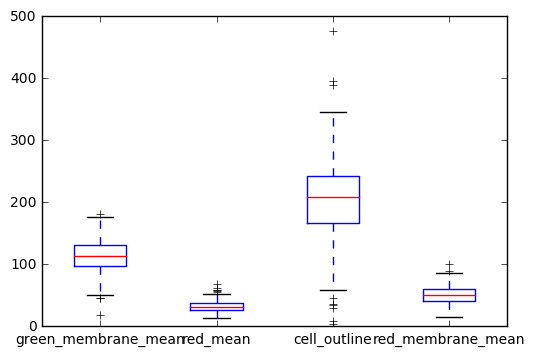

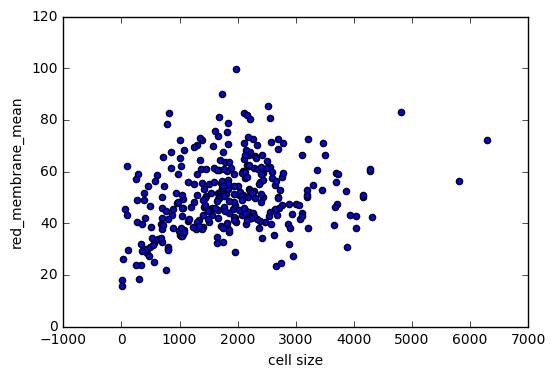


Linear fit of cell size to red membrane intensity
  slope		0.0037632134723
  intercept		43.4831259189
  r-value		0.272272866265
  p-value		8.57402395549e-07
  stderr		0.000749330881736
  r-squared		0.0741325137039


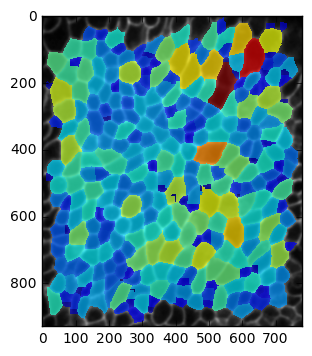

In [14]:
# (i) First get yourself an overview of what you're working with by printing the results. You can print all results by iterating over the dictionary. Make sure you fully understand the data structure (the dict and the lists contained within) before you proceed.
for key in results.keys():
    print "\n" + key
    print results[key]

# (ii) Create a box plot showing the mean cell and mean membrane intensities for both channels. You first need to retrieve the data you need from the dictionary and structure it properly so you can pass it to 'plt.boxplot'. Use the 'label' keyword of 'plt.boxplot' to label the x axis with the corresponding key names. 
plt.boxplot([results[key] for key in results.keys()][2:-1],labels=results.keys()[2:-1])
plt.show()

# (iii) Create a scatter plot of green membrane intensity over cell size. Add a linear fit to the plot to viszualize a potential correlation.

    # Import the module 'stats' from 'scipy'       
from scipy import stats

    # Use the function 'stats.linregress' to do a linear fit of membrane intensity vs cell size. Be sure to read the documentation to understand the output of this function.
linfit = stats.linregress(results["cell_size"],results["red_membrane_mean"])

    # Create a scatter plot of the mean green membrane intensity vs cell size. Use the function 'plt.scatter' to do so. Remember to label the axes, using the functions 'plt.xlabel' and 'plt.ylabel'. 
plt.scatter(results["cell_size"],results["red_membrane_mean"])
plt.xlabel("cell size")
plt.ylabel("red_membrane_mean")

    # Define the equation of the line that fits the data. Recall that the equation of a straight line in 2D is y = m * x + c, where m is the slope and c is the intersection of the y-axis. You need to create a function that takes in a value (x) and returns the fitted value (y). You can define your function normally (using the 'def' keyword') or if you are feeling fancy you can create an anonymous function using 'lambda'. The example below shows the difference between a normal function and an anonymous function:

         # # normal function definition
         # 	def f(x): 
         #      """Returns the square value"""
         #      return x**2
         #
         # anonymous function
         # f = lambda x: x**2       # returns the square value
fit = lambda x: linfit[0] * x + linfit[1]

    # Next, you need to get the actual fitted values to plot your line. You only need to evaluate your function at two points at the limits of your scatter plot so you can draw the line across the entire plot. You can get the limits for the x axis using 'plt.gca' and then 'get_xlim'. Once you have these x values, you can get the corresponding fitted y values using your line function (if you used 'lambda' to define it, use 'map' to get the result).
ax = plt.gca()        
x_lims = ax.get_xlim()
fit_vals = map(fit,x_lims)

    # Plot the line         
        # Plot the line using 'plt.plot'. You can specify the aesthetics of the line, e.g. line width, color, and so forth - see the documentation.
plt.gca().set_autoscale_on(False)         # Prevent the figure from rescaling when line is added, by using plt.gca().set_autoscale_on(False)

    # Finally, use 'plt.show' to show the plot.
plt.show()
    
# (iv) Print out results from the linear regression (again, check the documentation of 'stats.linregress'):

    # Define a list with the names of the output of the linear regression (e.g. 'slope',...)
linnames = ["slope","intercept","r-value","p-value","stderr"]            # Names of results of stats.linregress

    # Iterate over all values in the 'stats.linregress' output.
print "\nLinear fit of cell size to red membrane intensity"              # Header
for index,value in enumerate(linfit):
        # Print the output value with the corresponding name. To simultaneously iterate over the output of 'stats.linregress' and over your list of output names, the function 'enumerate' is very helpful. You can check the docs or the web to find out how to use 'enumerate' in for-loops.
    print "  " + linnames[index] + "\t\t" + str(value)
    # (After the for loop), also calculate and print the r-squared value
print "  r-squared\t\t" + str(linfit[2]**2)
    # Note that this seems to return a highly significant p-value but a very low correlation coefficient (r-value). We also would not expect this correlation to be present in our data. This should prompt several considerations:
        # 1) What does this p-value actually mean? See help(stats.linregress)
        # 2) Could there be artefacts in our segmentation that could bias this analysis?
        # 3) We're now working with a lot of datapoints - this can skew statistical analyses. We can (and should!) accommodate this by multiple testing correction and by comparison with randomized datasets.
    # In general, it's always good to be very careful when doing data analysis. Make sure you understand the functions you are using and always check for possible errors or biases in your analysis!


# (v) Map the cell size back onto the image as a 'heatmap':

    # Scale the cells sizes to 8bit (since we need them as pixel intensity values). 
    # Hint: if the largest cell size should correspond to the value 255 in uint8, then the other cell sizes correspond to cell_size*255/largest_cell_size.
sizes_8bit = results["cell_size"] / max(results["cell_size"]) * 255
    # Initialize a new image; all values should be zeros, the size should be identical to e.g. 'green_ws' and the dtype should be uint8. (Suggested name for variable: 'size_img')
size_map = np.zeros_like(green_ws,dtype=np.uint8)    
    # Iterate over the segmented cells of 'green_ws'.(You need a for-loop, and the functions 'enumerate' and 'np.unique'.)
for index,cell_id in enumerate(np.unique(green_ws)[1:]):
        # Assign to each pixel of 'size_img' the cell size (in uint8) of the cell it corresponds to in 'green_ws'
    size_map[green_ws==cell_id] = sizes_8bit[index]
    # Visualize the result as a colored semi-transparent overlay over the smoothed input image 'green_smooth'.
plt.imshow(green_smooth,cmap='gray',interpolation='none')            # Set grayscale background image
plt.imshow(np.ma.array(size_map,mask=size_map==0),interpolation='none',alpha=0.7)  # Colored overlay
plt.show()

# (vi)
# Do an analysis of statistical tests and the rest of the measurements. Think about what the results actually mean and whether any inconsistancies can be traced back to a not sufficiently good segmentation, e.g. we  have filtered for some artifacts, such as incomplete cells (that touch the boundary), but not for others; can you think of some?.


## Writing Output to Files

There are several ways of saving the output of a program. Data can be saved to files in a human-readable format such as text files (e.g. to import into Excel), in a format readable for other programs such as tif-images (e.g. to visualize in Fiji) or in a language-specific file that makes it easy to reload the data into python in the future (e.g. for further analysis).

#### Exercise
Follow the instructions in the comments below.

In [15]:
# (i) Write an image to a tif (could be opened e.g. in Fiji):

    # Get the file handling function 'imsave' from the package 'tifffile'
from tifffile import imsave
    # Save one of the images you've generated using 'imsave' and open it in Fiji
imsave(filename+"_labeledEdges.tif",green_edges_labeled,bigtiff=True)

# (ii) Write a figure to a png or pdf:

    # Recreate the scatter plot from above (without the regression line). Remember to label axes.
plt.scatter(results["cell_size"],results["red_membrane_mean"])  
plt.xlabel("cell size")                                    
plt.ylabel("red membrane mean")
    # Save the figure to png using 'plt.savefig'
plt.savefig(filename+'_scatter.png', bbox_inches='tight')
    # Save the figure to pdf using 'plt.savefig'. This creates a vector graphic that can be imported to illustrator etc.
plt.savefig(filename+'_scatter.pdf', bbox_inches='tight')


# ***For the next two exercises, refer to the python documentation for input and output.***

# (iii) Write a python file that can be reloaded in other Python programs:

    # Import the module 'json'
import json
    # Open an empty file object using 'open' in write ('w') mode. Use a name that contains the extension '.json'. You should use the 'with'-statement (context manager) to make sure that the file object will be closed automatically when you are done with it.
with open('k_resultsDict.json', 'w') as fp:
        # Use the function 'json.dump' to write the results.    
    json.dump(results, fp)       

# Note: This file could be re-loaded again as follows:
#with open(filename+'_resultsDict.json', 'r') as fp:
#   results = json.load(fp)


# (iv) Write a text file of the numerical data gathered (could be opened e.g. in Excel):

# Open an empty file object using 'open' in write ('w') mode. Use a name that contains the extension '.txt'. You should use the 'with'-statement (context manager) to make sure that the file object will be closed automatically when you are done with it.
with open(filename+"_output.txt","w") as txt_out:
    # Write the headers of the data (the result dictionary keys), separated with tabs ('\t'). You will need the function 'file.write' to write strings to the file. It makes sense to first generate a complete string of all the headers with a loop and then write it to the file.
    txt_out.write(''.join(key+'\t' for key in results.keys()) + '\n') 
    # Iterate over all cells saved in your results variable using a for-loop and the function 'enumerate'.
    for index,value in enumerate(results["cell_id"]):
        # For each key in the dict, write the data to the text file, separated with tabs ('\t').
        txt_out.write(''.join(str(results[key][index])+'\t' for key in results.keys()) + '\n')
    # After writing the data, have a look at the output file in a text editor.


This concludes the tutorial.